In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/wine.csv',encoding = 'unicode_escape')
data.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,14.23,1.71,127,3.06,0.28,5.64,1065,0
1,13.20,1.78,100,2.76,0.26,4.38,1050,0
2,13.16,2.36,101,3.24,0.30,5.68,1185,0
3,14.37,1.95,113,3.49,0.24,7.80,1480,0
4,13.24,2.59,118,2.69,0.39,4.32,735,0


In [3]:
data_cult = data.copy()

Wines grown in the same region in Italy but by three different cultivators were analysed. The
analysis determined the quantities of 7 constituents found in each wine. Results of the chemical
analysis can be found in the file wine.csv. The variable “cultivator” indicates which of the three
cultivators each wine originated. The remaining variables are names of each constituent.


In [4]:
data = data.drop(['cultivator'],axis=1)

# A)

Simple exploratory data analysis

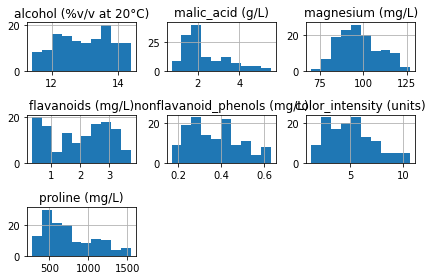

In [5]:
data.hist()
plt.tight_layout()
plt.show()

PCA should be carried out on correlation matrix

In [6]:
data.describe()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,12.987786,2.324733,97.679389,1.984580,0.369008,5.079771,749.885496
std,0.797958,1.043741,11.576679,1.001207,0.118204,2.201531,322.561852
min,11.410000,0.740000,70.000000,0.340000,0.170000,1.280000,278.000000
25%,12.315000,1.645000,88.000000,0.880000,0.280000,3.250000,505.000000
50%,13.050000,1.880000,97.000000,2.110000,0.370000,4.900000,672.000000
75%,13.685000,2.975000,105.500000,2.890000,0.435000,6.275000,1005.000000
max,14.390000,5.510000,127.000000,3.740000,0.630000,10.680000,1547.000000


In [7]:
from sklearn.preprocessing import scale
# scaling the data before PCA
data_reduced = pd.DataFrame(scale(data), columns=data.columns)
data_reduced.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,1.562716,-0.591231,2.542453,1.078247,-0.755894,0.255449,0.980662
1,0.266967,-0.523908,0.201225,0.777458,-0.925743,-0.319077,0.933981
2,0.216646,0.033919,0.287937,1.258720,-0.586044,0.273688,1.354112
3,1.738838,-0.360407,1.328483,1.509377,-1.095592,1.240351,2.272176
4,0.317287,0.255126,1.762044,0.707274,0.178277,-0.346435,-0.046325


In [8]:
pca_ = PCA(n_components=7).fit(data_reduced)
# Pick components = 7
#Note that pca.transform() returns scores based on centred data
pca_samples = pca_.transform(data_reduced)

# B)

In [9]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions 
    
    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [10]:
pca_results = pca_results(data_reduced, pca_)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
PC 1,3.0084,0.4265,0.4265,0.4118,-0.2166,0.3923,0.4317,-0.3888,0.1845,0.5080
PC 2,2.1718,0.3079,0.7344,0.3584,0.5076,0.2185,-0.3708,0.3265,0.5544,0.1209
PC 3,0.5888,0.0835,0.8178,-0.3204,0.3503,0.7918,0.0457,-0.1262,-0.2683,-0.2403
PC 4,0.4619,0.0655,0.8833,0.1060,0.5560,-0.3540,-0.0159,-0.7333,0.0108,-0.1272
PC 5,0.3959,0.0561,0.9395,-0.2835,-0.4337,0.1451,-0.2860,-0.3672,0.6202,-0.3305
PC 6,0.2398,0.0340,0.9734,-0.7041,0.2488,-0.1422,0.2676,0.0680,0.3140,0.4973
PC 7,0.1873,0.0266,1.0000,0.1093,0.1165,-0.0701,0.7214,0.2215,0.3212,-0.5449


<Figure size 432x288 with 0 Axes>

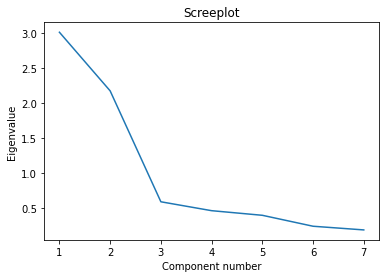

In [11]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca_.explained_variance_)+1), pca_.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [12]:
#Extract only 3 PCs
pca2 = PCA(n_components=3).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [13]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=9, height=9, margin=0.2):

    fig, ax = plt.subplots(figsize = (width,height))
    sns.set_style('darkgrid')

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2
    colors = sns.color_palette( as_cmap= True) 
    


    for i, v in enumerate(pca.components_.T):
        # display(colors[i])
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color=colors[i] , label = data.columns[i] )

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    ax.legend() 
    
    return ax

In [14]:
#Obtain scores from original data that are not centred

scores_notcentred = np.dot(data_reduced, pca2.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2', 'PC3'])
scores_notcentred.head()

,PC1,PC2,PC3
0,3.073581,0.428910,1.145812
1,1.413477,-0.780900,-0.096167
2,1.704442,-0.184967,-0.096864
3,3.775921,0.775342,-0.302990
4,0.915151,0.226433,1.496797


In [15]:
# pip install plotly

In [16]:
import plotly.graph_objs as go

# trace1 = go.Scatter3d(
#     x=scores2[:,0],
#     y = scores2[:,1],
#     z = scores2[:,2],
#     mode='markers',
#     marker=dict(
#         size=12,
#         opacity=0
# )

# ) 

dc_1 = go.Scatter3d( x = [0,pca2.components_.T[0][0]*10],
                     y = [0,pca2.components_.T[0][1]*10],
                     z = [0,pca2.components_.T[0][2]*10],
                     marker = dict( size = 1,
                                    color = "rgb(84,48,5)"),
                     line = dict( color = "red",
                                width = 6),
                     name = "alcohol (%v/v at 20°C)"
                     )
dc_2 = go.Scatter3d( x = [0,pca2.components_.T[1][0]*10],
                   y = [0,pca2.components_.T[1][1]*10],
                   z = [0,pca2.components_.T[1][2]*10],
                   marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                   line = dict( color = "green",
                                width = 6),
                   name = "malic_acid (g/L)"
                 )
dc_3 = go.Scatter3d( x = [0,pca2.components_.T[2][0]*10],
                     y = [0,pca2.components_.T[2][1]*10],
                     z = [0,pca2.components_.T[2][2]*10],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "blue",
                                width = 6),
                     name = "magnesium (mg/L)"
                 ) 
dc_4 = go.Scatter3d( x = [0,pca2.components_.T[3][0]*10],
                     y = [0,pca2.components_.T[3][1]*10],
                     z = [0,pca2.components_.T[3][2]*10],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "purple",
                                width = 6),
                     name = "flavanoids (mg/L)"
                 ) 
dc_5 = go.Scatter3d( x = [0,pca2.components_.T[4][0]*10],
                     y = [0,pca2.components_.T[4][1]*10],
                     z = [0,pca2.components_.T[4][2]*10],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "yellow",
                                width = 6),
                     name = "nonflavanoid_phenols (mg/L)"
                   )
dc_6 = go.Scatter3d( x = [0,pca2.components_.T[5][0]*10],
                     y = [0,pca2.components_.T[5][1]*10],
                     z = [0,pca2.components_.T[5][2]*10],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "brown",
                                width = 6),
                     name = "color_intensity (units)")

dc_7 = go.Scatter3d( x = [0,pca2.components_.T[6][0]*10],
                     y = [0,pca2.components_.T[6][1]*10],
                     z = [0,pca2.components_.T[6][2]*10],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "orange",
                                width = 6),
                     name = "proline (mg/L)")
arr = [dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7]
layout = go.Layout(
    xaxis=dict(
        titlefont=dict(
           family='Courier New, monospace',
           size=18,
           color='#7f7f7f'
       )
   )
)

minpca = pca_results[data_reduced.columns] *10
mins = minpca.min(axis = 1 )
maxs = minpca.max(axis = 1 )

arr.append(go.Scatter3d( x = [mins['PC 1'],maxs['PC 1']],
                         y = [0,0],
                         z = [0,0],
                         marker = dict( size = 1,
                                        color = 'black',
                         line = dict( color = 'black',
                                    width = 6),
                        
                         ) ,line  = dict( dash = 'dash')))

arr.append(go.Scatter3d( x = [0,0],
                         y = [mins['PC 2'],maxs['PC 2']],
                         z = [0,0],
                         marker = dict( size = 1,
                                        color = 'black',
                         line = dict( color = 'black',
                                    width = 6),
                        
                         ) ,line  = dict( dash = 'dash')))
arr.append(go.Scatter3d( x = [0,0],
                         y = [0,0],
                         z = [mins['PC 3'],maxs['PC 3']],
                         marker = dict( size = 1,
                                        color = 'black',
                         line = dict( color = 'black',
                                    width = 6 ),
                         
                         ) ,line  = dict( dash = 'dash')))

fig = go.Figure(data=arr, layout=layout)

fig.update_layout(
    scene = dict(xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3' ),
    title="Loading plot",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()


# C)

In [17]:
data.describe()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,12.987786,2.324733,97.679389,1.984580,0.369008,5.079771,749.885496
std,0.797958,1.043741,11.576679,1.001207,0.118204,2.201531,322.561852
min,11.410000,0.740000,70.000000,0.340000,0.170000,1.280000,278.000000
25%,12.315000,1.645000,88.000000,0.880000,0.280000,3.250000,505.000000
50%,13.050000,1.880000,97.000000,2.110000,0.370000,4.900000,672.000000
75%,13.685000,2.975000,105.500000,2.890000,0.435000,6.275000,1005.000000
max,14.390000,5.510000,127.000000,3.740000,0.630000,10.680000,1547.000000


In [18]:
import plotly.express as px
def plot_3d(ann=None):
    fig = px.scatter_3d(scores_notcentred, x='PC1', y='PC2', z='PC3',
                color=data_cult.cultivator.astype('string'),title='Score Plot')
    if ann:
        fig.update_layout(
            scene=dict(
                # xaxis=dict(type="date"),
                # yaxis=dict(type="category"),
                # zaxis=dict(type="log"),
                annotations=[
                dict(
                    showarrow=False,
                    x=-1.67,
                    y=0.992,
                    z=0.177,
                    text="Point",
                    xanchor="left",
                    xshift=10,
                    opacity=1)]
            ),
        )  
    fig.update_layout(
    legend_title="Cultivator",
)
    fig.show()

plot_3d()

Plot with point 

In [19]:
plot_3d(True)

# D)

In [20]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=15, height=8, margin=0.5,text = None):
    plt.figure(figsize=(width, height))
    sns.set_style('darkgrid')
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.cultivator)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
        
    text_pos = 30


    # Print text
    if text:
        ax.text(-1.6692325,0.9924264,'Here', color='black', ha='center', va='center', fontsize=12)
    # for i, v in enumerate(np.array(scores)):
    #     ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=12)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

In [21]:
np.array([[-0.313,0.76, -0.147, -1.37, 1.28 , -0.236 , -0.365]]) @ np.round(pca2.components_[:2].T , 4)

array([[-1.6692325,  0.9924264]])

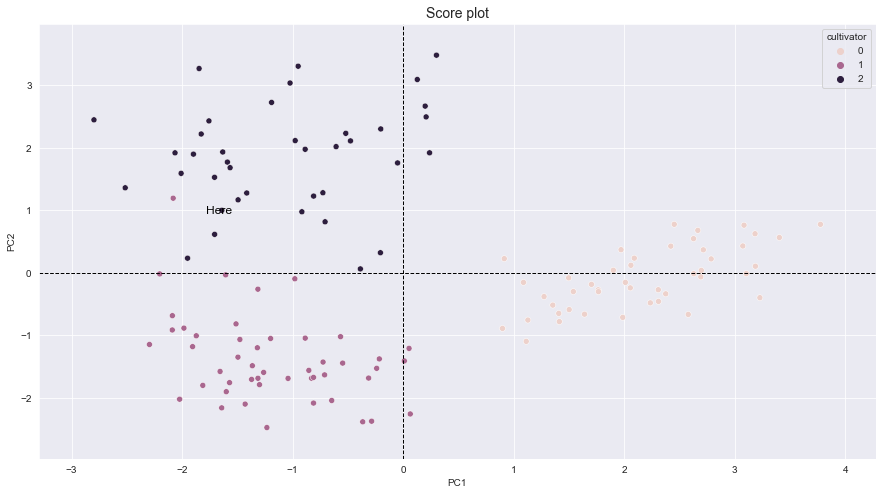

In [22]:
scoreplot_label(data_cult,scores_notcentred, pca2,text=True)
plt.show()

In [23]:
concatted = pd.concat((data_cult[['cultivator']] , pd.DataFrame(scores2 , columns = ['PC1', 'PC2' , 'PC3'])) , axis = 1 )

In [24]:
concatted2 = concatted.melt(id_vars='cultivator', var_name='pc')

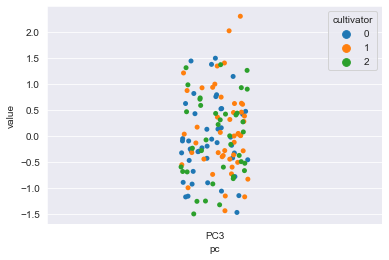

In [25]:
sns.stripplot(data=concatted2[concatted2['pc'] == 'PC3'],x='pc', y='value',hue='cultivator')
plt.show()

In [26]:
plot_3d()